In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import missingno as msno 

%matplotlib inline

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format
pd. set_option('display.max_rows', 500)
pd.set_option("display.max_columns", None)


In [102]:
house = pd.read_csv("train.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,"1,999.00",RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.00,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,"1,978.00",Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.00,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,"1,941.00",RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0

In [103]:
print(f'There are {house.shape[0]} rows and {house.shape[1]} columns') # fstring 

There are 1460 rows and 81 columns


In [104]:
# print ("Rows     : " , house.shape[0])  #get number of rows/observations
# print ("Columns  : " , house.shape[1]) #get number of columns
# print ("#"*40,"\n","Features : \n\n", house.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", house.isnull().sum().sort_values(ascending=False).nlargest(30))
# print( "#"*40,"\nPercent of missing :\n\n", round(house.isna().sum() / house.isna().count() * 100, 2)) # looking at columns with most Missing Values
# print ("#"*40,"\nUnique values :  \n\n", house.nunique())  #  count of unique values

######################################## 
Missing values :

 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64


<AxesSubplot:>

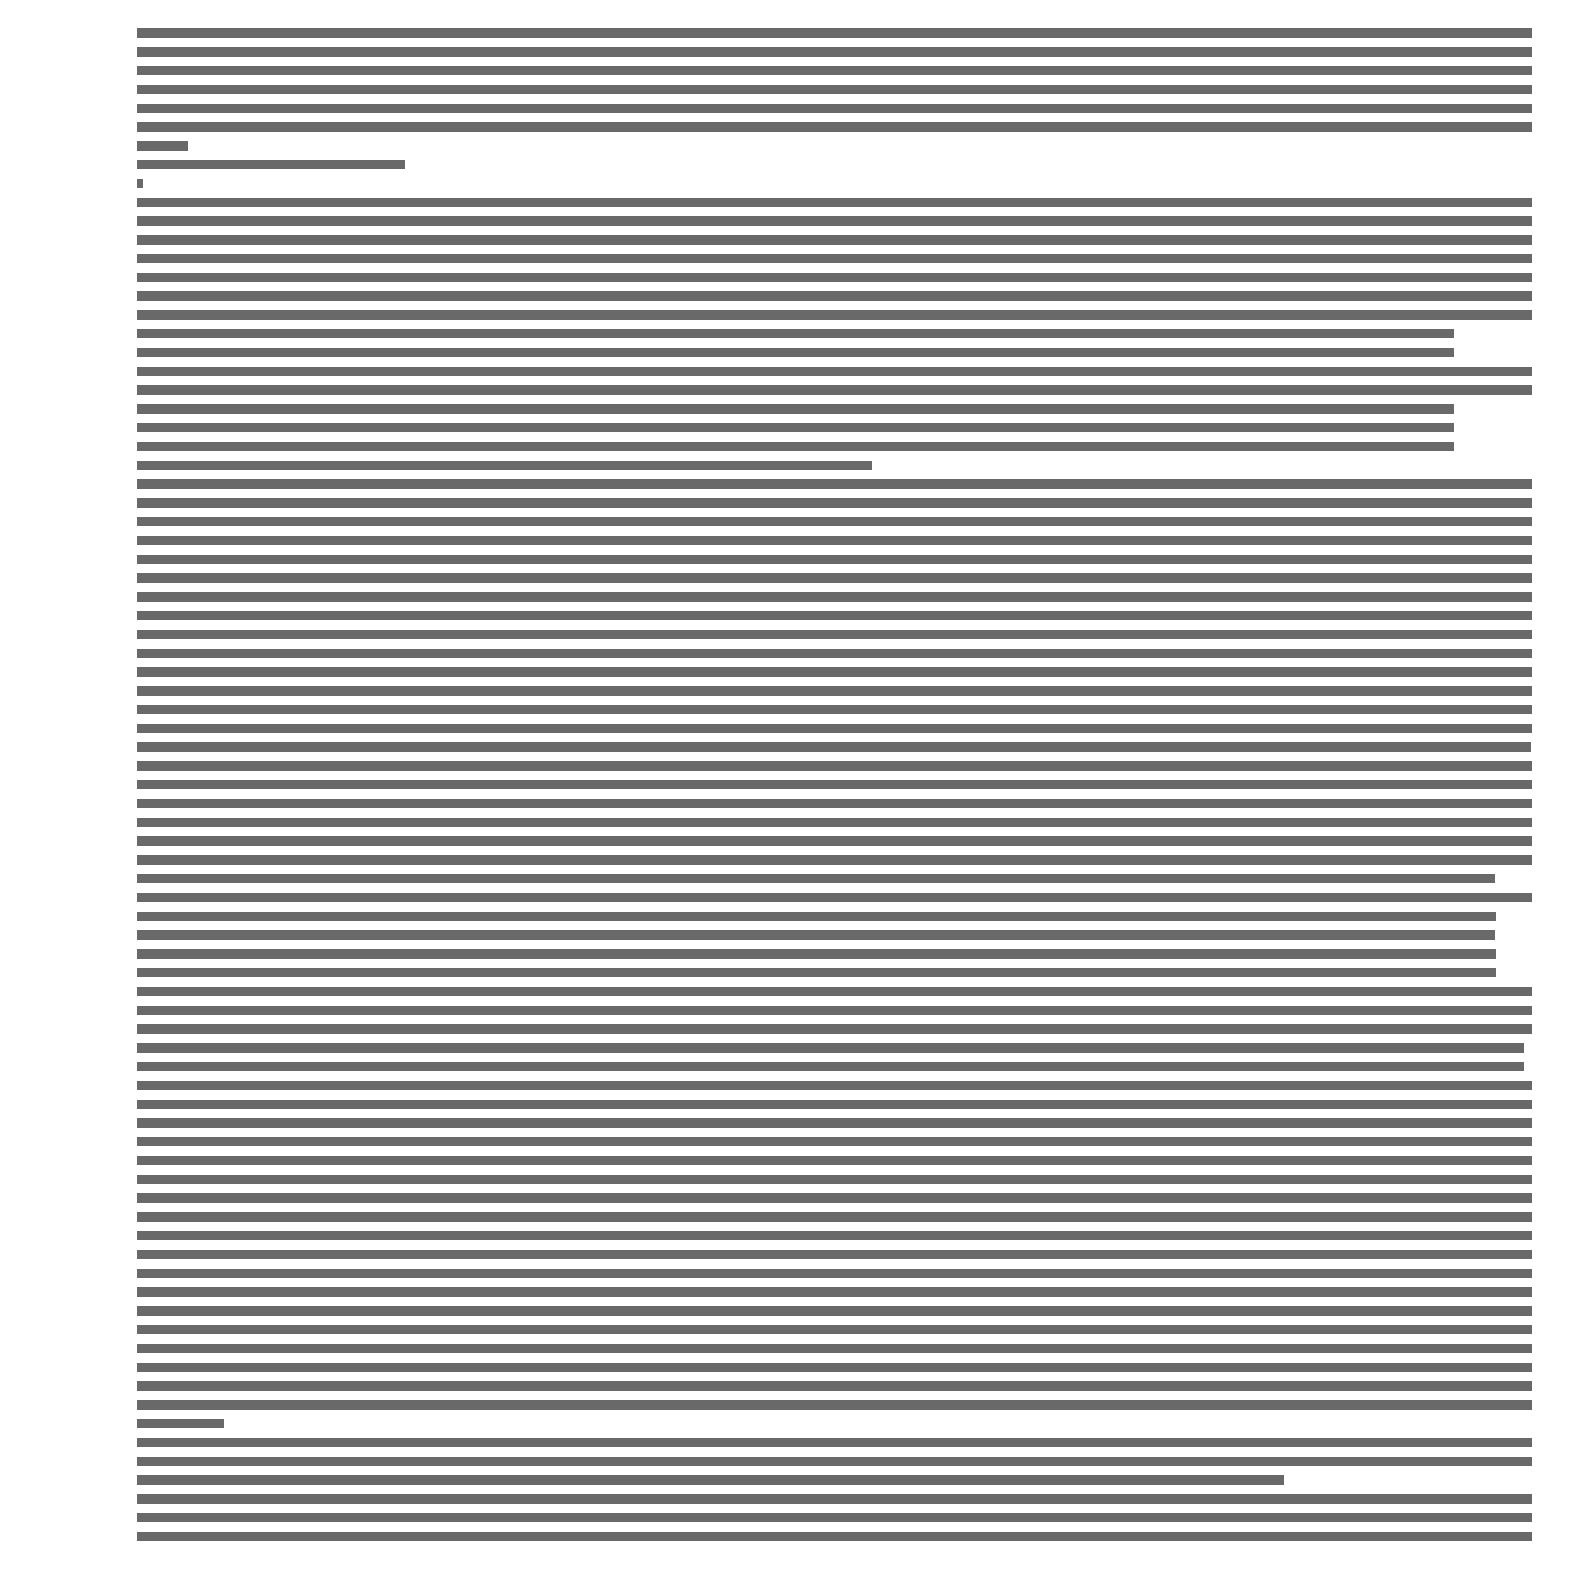

In [105]:
#Visualize missing values
msno.bar(house)

## Correlation in Data

In [113]:
corr=house.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.00
OverallQual      0.78
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.61
1stFlrSF         0.60
TotalBsmtSF      0.60
FullBath         0.57
TotRmsAbvGrd     0.55
YearBuilt        0.50
YearRemodAdd     0.50
GarageYrBlt      0.48
MasVnrArea       0.47
Fireplaces       0.45
BsmtFinSF1       0.36
OpenPorchSF      0.32
2ndFlrSF         0.31
WoodDeckSF       0.31
HalfBath         0.26
LotArea          0.25
BsmtFullBath     0.21
BsmtUnfSF        0.19
BedroomAbvGr     0.17
ScreenPorch      0.10
PoolArea         0.09
3SsnPorch        0.04
MoSold           0.04
LowQualFinSF    -0.01
MiscVal         -0.02
YrSold          -0.02
BsmtHalfBath    -0.03
Id              -0.03
BsmtFinSF2      -0.03
MSSubClass      -0.08
OverallCond     -0.11
KitchenAbvGr    -0.11
EnclosedPorch   -0.13
Name: SalePrice, dtype: float64

OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF ,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd have more than 0.5 correlation with SalePrice.

EnclosedPorch and KitchenAbvGr have little negative correlation with target variable.

These can prove to be important features to predict SalePrice.

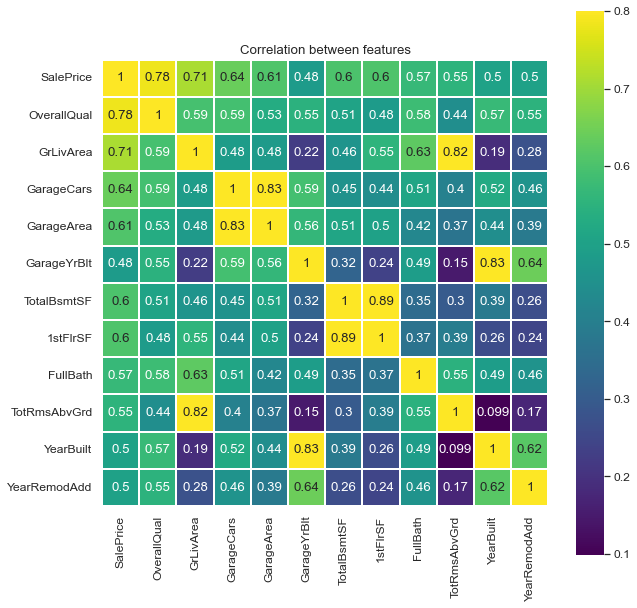

In [115]:
corrMatrix=house[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

#### Visualising important features

In [117]:
house[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
8,10,"437,034.76"
7,9,"367,513.02"
6,8,"275,833.76"
5,7,"208,194.84"
4,6,"163,069.67"
3,5,"135,481.46"
2,4,"113,702.02"
1,3,"98,009.38"
0,2,"47,655.50"


In [119]:
house[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
3,4,"192,655.80"
2,3,"308,911.39"
1,2,"185,528.61"
0,1,"128,821.77"


In [120]:
house[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,"252,000.00"
2,2,"243,302.32"
1,1,"213,387.49"
0,0,"147,162.77"


In [106]:
# some columns have too many missing values to keep 
# these columns are:
useless = ['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'LotFrontage',
]

# I can afford to drop some rows with missing values, thats fine I still have a lot to work with
dropna = ['GarageType'   
'GarageCond',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'BsmtFinType2',
'BsmtExposure',
'BsmtFinType1',
'BsmtCond',
'BsmtQual',
'MasVnrArea',
'MasVnrType',
'Electrical',]
house.drop(useless, axis = 'columns', inplace = True)
print("#"*40,"\nMissing values :\n\n", house.isnull().sum().sort_values(ascending=False).nlargest(15))


######################################## 
Missing values :

 GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
PavedDrive       0
WoodDeckSF       0
dtype: int64


In [107]:
house.dropna(inplace=True)
print ("#"*40,"\nMissing values :\n\n", house.isnull().sum().sort_values(ascending=False).nlargest(15))

######################################## 
Missing values :

 Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64


In [108]:
house['MSZoning'].dtype

dtype('O')

In [109]:
#  making a list of categorical columns

catCol = []
for i in house.columns.to_list():
    dataTypeObj = house.dtypes[i]
    if (dataTypeObj == "object"):
        catCol.append(i)
    
catCol


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [110]:
# Printing number of count of each unique value in each column
for column in catCol:
    print(house[column].value_counts())
    print("#" * 40)

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
########################################
Pave    1333
Grvl       5
Name: Street, dtype: int64
########################################
Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64
########################################
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64
########################################
AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64
########################################
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64
########################################
Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64
########################################
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
Br

The above information can be used to gain a lot of insights about the houses that are currently in the market. There are also no missing values in neighbourhood which is good because neighborhoods probably play a huge role in deciding the price of a house

In [111]:
house.groupby(house.Neighborhood).size().sort_values(ascending = False)

Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
dtype: int64